In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, pearsonr

**Review the Source Documentation**

In [4]:
Cab_Data = pd.read_csv('datasets/Cab_Data.csv')
Cab_Data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [5]:
City = pd.read_csv('datasets/City.csv')
City

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
Customer_ID = pd.read_csv('datasets/Customer_ID.csv')
Customer_ID

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [7]:
Transaction_ID = pd.read_csv('datasets/Transaction_ID.csv')
Transaction_ID

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


**Understand the field names and data types**

In [7]:
Cab_Data.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [8]:
City.dtypes

City          object
Population    object
Users         object
dtype: object

In [9]:
Customer_ID.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [10]:
Transaction_ID.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

**Identify relationships across the files & Determine which files should be joined versus which ones should be appended & Create master data and explain the relationship**


In [8]:
Cab_Data_and_City = pd.merge(Cab_Data, City, on='City')
Cab_Data_and_City

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001"
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001"
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001"
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001"


In [9]:
Customer_ID_and_Transaction_ID = pd.merge(Customer_ID, Transaction_ID, on='Customer ID')
Customer_ID_and_Transaction_ID

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


In [10]:
all_datasets_merged = pd.merge(Cab_Data_and_City, Customer_ID_and_Transaction_ID, on='Transaction ID')
all_datasets_merged

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Male,28,10813,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Male,27,9237,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701",28712,Male,53,11242,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701",28020,Male,23,23327,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701",27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001",52392,Male,24,15651,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001",53286,Male,32,6528,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001",52265,Male,56,7966,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001",52175,Male,32,6423,Card


**Field/feature transformations**

In [11]:
all_datasets_merged['Population'] = [x.replace(',','') for x in all_datasets_merged['Population']]
all_datasets_merged['Population'] = all_datasets_merged['Population'].astype(int)

In [12]:
all_datasets_merged['Users'] = [x.replace(',','') for x in all_datasets_merged['Users']]
all_datasets_merged['Users'] = all_datasets_merged['Users'].astype(int)

In [16]:
all_datasets_merged.dtypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population              int64
Users                   int64
Customer ID             int64
Gender                 object
Age                     int64
Income (USD/Month)      int64
Payment_Mode           object
dtype: object

**Identify and remove duplicates**

In [17]:
all_datasets_merged.duplicated().sum()

0

**Perform other analysis like NA value and outlier detection**

In [18]:
all_datasets_merged.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Payment_Mode          0
dtype: int64

**Total Transactions per Company**

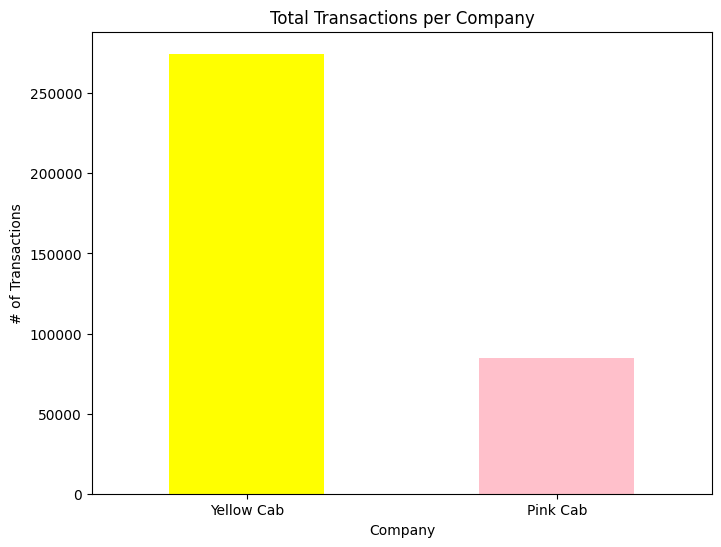

In [13]:
transactions_per_company = all_datasets_merged['Company'].value_counts()
plt.figure(figsize=(8, 6))
transactions_per_company.plot(kind='bar', color=['yellow', 'pink'])
plt.title('Total Transactions per Company')
plt.xlabel('Company')
plt.ylabel('# of Transactions')
plt.xticks(rotation=0)  
plt.show()

**Total Transactions per City**

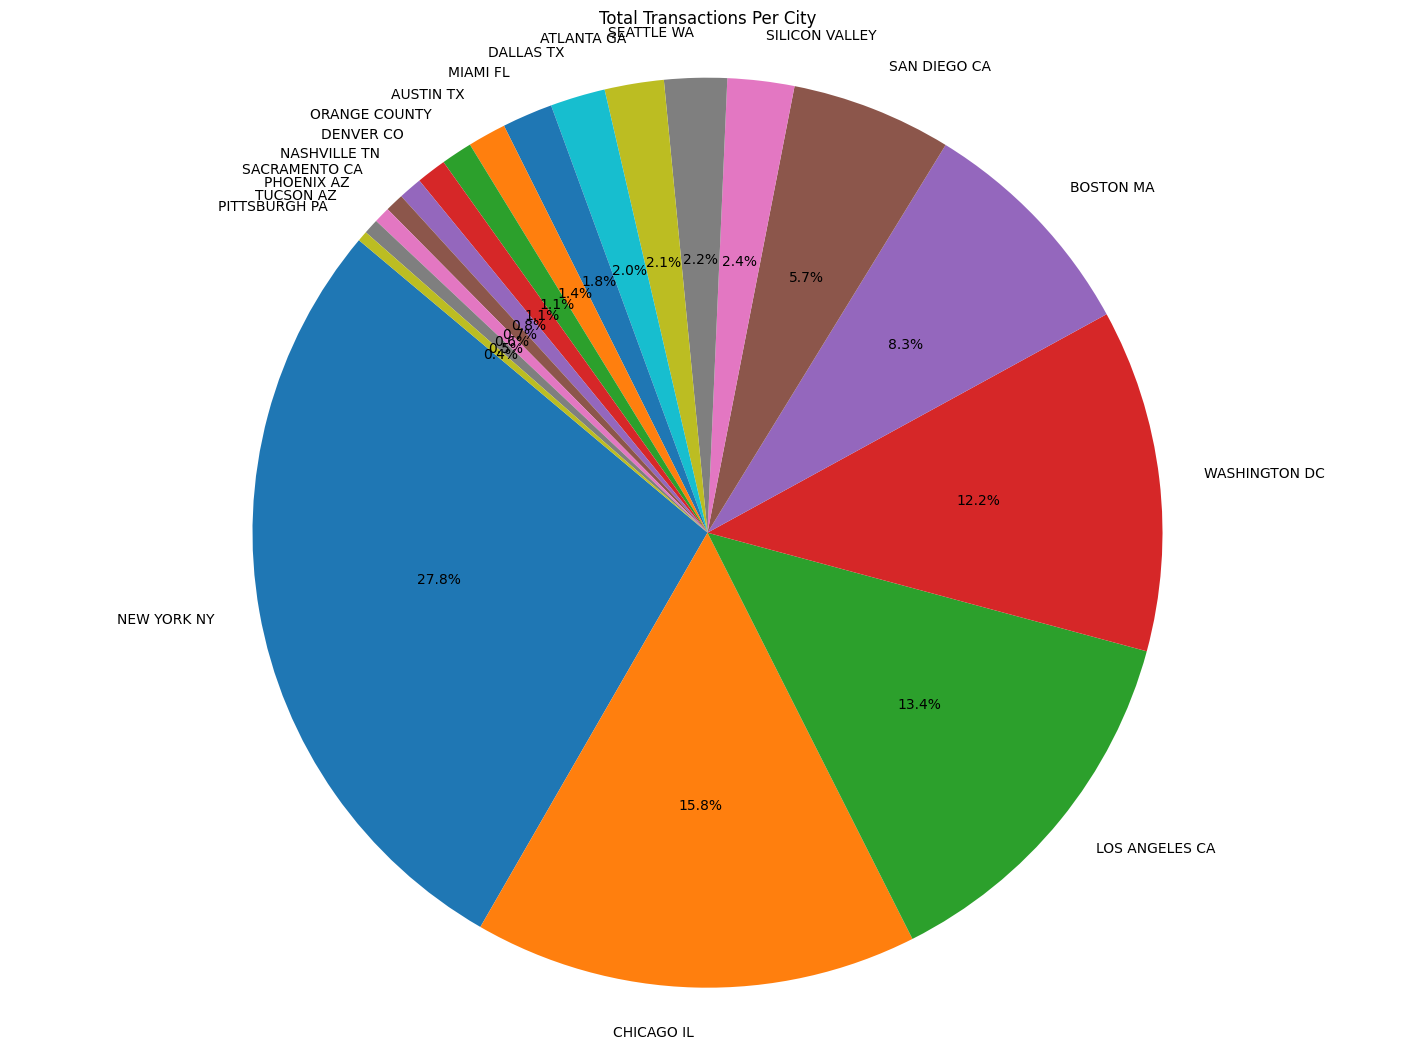

In [20]:
city_transaction_counts = all_datasets_merged['City'].value_counts()
plt.figure(figsize=(18, 13))
plt.pie(city_transaction_counts, labels=city_transaction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Transactions Per City')
plt.axis('equal') 
plt.show()

**Total Number of Users per Payment Mode**

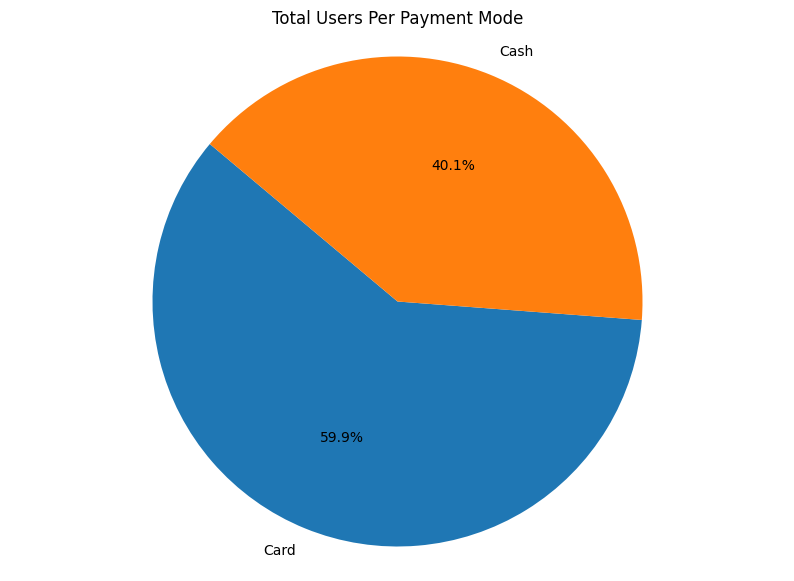

In [21]:
payment_mode_users = all_datasets_merged.groupby('Payment_Mode')['Users'].sum()
plt.figure(figsize=(10, 7))
plt.pie(payment_mode_users, labels=payment_mode_users.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Users Per Payment Mode')
plt.axis('equal')  
plt.show()

**Total Km traveled per Company**

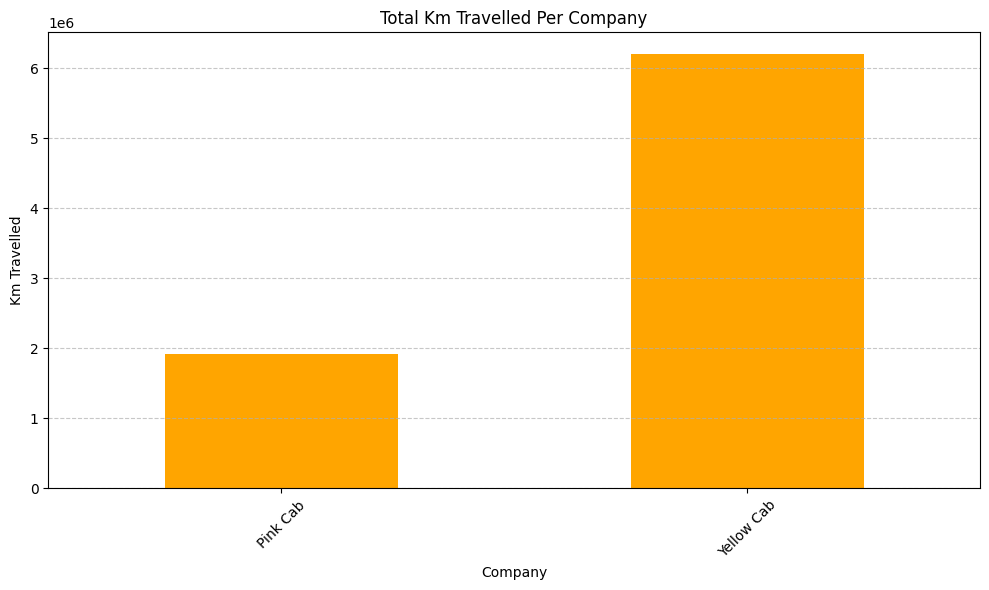

In [15]:
company_km_traveled = all_datasets_merged.groupby('Company')['KM Travelled'].sum()
plt.figure(figsize=(10, 6))
company_km_traveled.plot(kind='bar', color='orange')
plt.title('Total Km Travelled Per Company')
plt.xlabel('Company')
plt.ylabel('Km Travelled')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Price charged per company**

/var/folders/y7/gxfrxy3d5fb2t5_g78gjy8j80000gn/T/ipykernel_27117/2719234176.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([company_price_data[company_price_data['Company'] == company]['Price Charged'] for company in company_price_data['Company'].unique()],labels=company_price_data['Company'].unique())


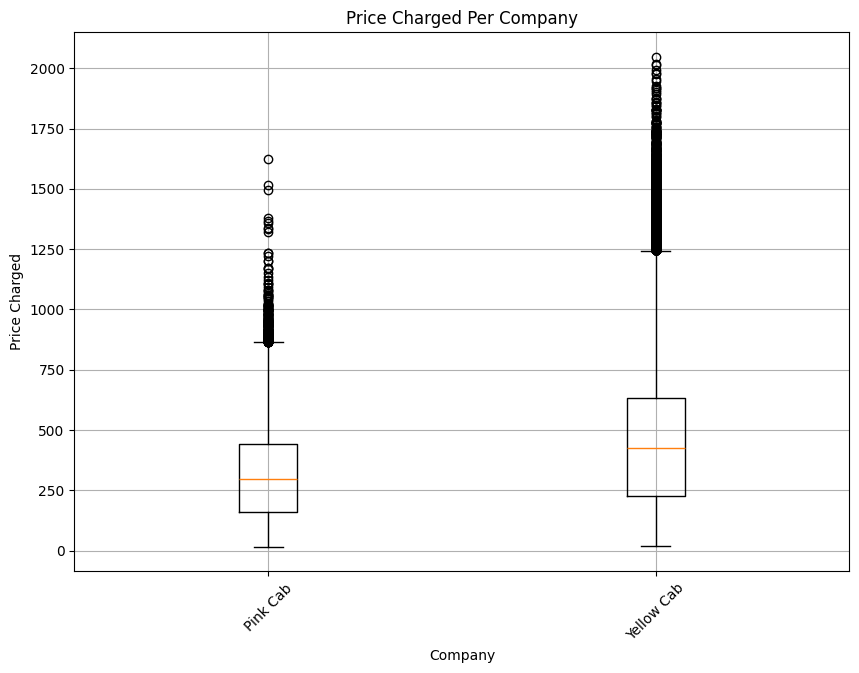

In [23]:
company_price_data = all_datasets_merged[['Company', 'Price Charged']]
plt.figure(figsize=(10, 7))
plt.boxplot([company_price_data[company_price_data['Company'] == company]['Price Charged'] for company in company_price_data['Company'].unique()],labels=company_price_data['Company'].unique())
plt.title('Price Charged Per Company')
plt.xlabel('Company')
plt.ylabel('Price Charged')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

**Price Charged vs Cost of Trip**

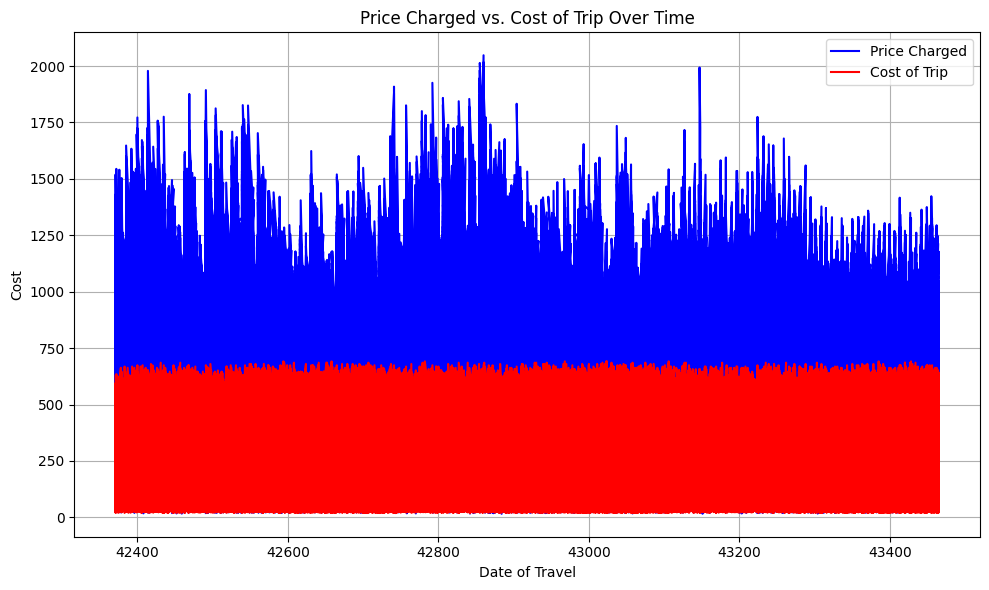

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(all_datasets_merged["Date of Travel"], all_datasets_merged["Price Charged"], label='Price Charged', color='blue')
plt.plot(all_datasets_merged["Date of Travel"], all_datasets_merged["Cost of Trip"], label='Cost of Trip', color='red')
plt.xlabel('Date of Travel')
plt.ylabel('Cost')
plt.title('Price Charged vs. Cost of Trip Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Total Transactions per Gender**

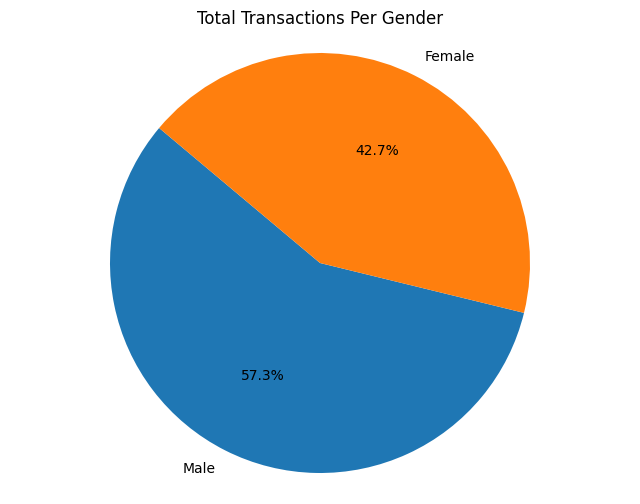

In [37]:
gender_transaction_counts = all_datasets_merged['Gender'].value_counts()
plt.figure(figsize=(8, 6))  
plt.pie(gender_transaction_counts, labels=gender_transaction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Transactions Per Gender')
plt.axis('equal')  
plt.show()

**Number of Transactions vs Price Charged**

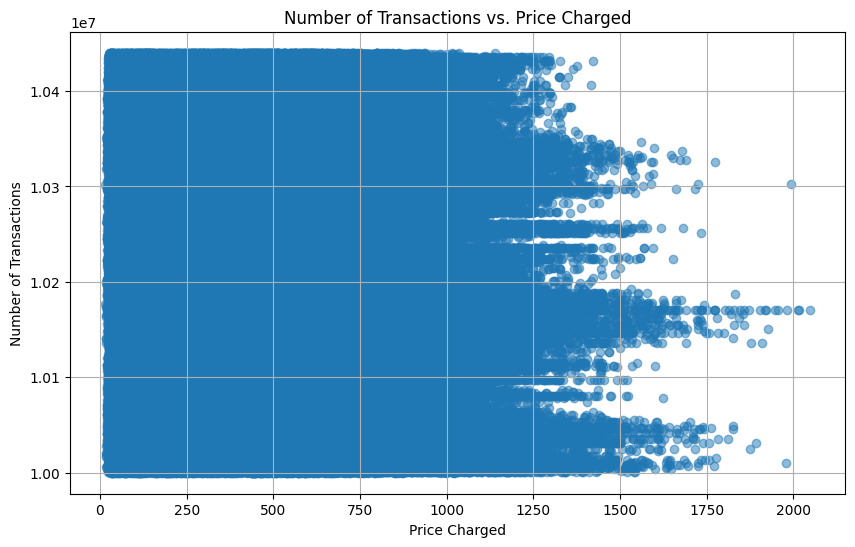

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(all_datasets_merged['Price Charged'], all_datasets_merged['Transaction ID'], alpha=0.5)
plt.title('Number of Transactions vs. Price Charged')
plt.xlabel('Price Charged')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

**Company vs City**

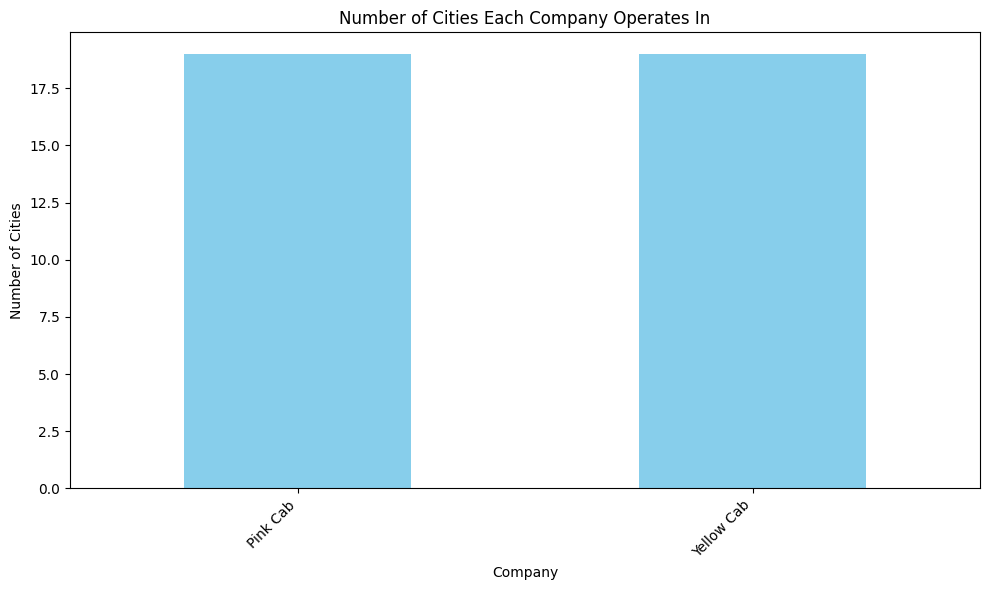

In [39]:
company_city_counts = all_datasets_merged.groupby('Company')['City'].nunique()
plt.figure(figsize=(10, 6))
company_city_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Cities Each Company Operates In')
plt.xlabel('Company')
plt.ylabel('Number of Cities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Hypothesis 1**

H0: The average price charged per trip is the same for all companies.

H1: The average price charged per trip is different for different companies.

In [43]:
yellow_cab = all_datasets_merged[all_datasets_merged['Company'] == 'Yellow Cab']
pink_cab = all_datasets_merged[all_datasets_merged['Company'] == 'Pink Cab']

t_stat, p_value = ttest_ind(yellow_cab['Price Charged'], pink_cab['Price Charged'], equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

print()
if p_value < 0.05:
    print("The average price charged per trip is different for different companies.")
else:
    print("The average price charged per trip is the same for all companies.")


T-statistic: 176.9420166560819
P-value: 0.0

The average price charged per trip is different for different companies.


**Hypothesis 2**

H0: Gender does not influence the choice of payment mode.

H1: Gender influences the choice of payment mode.

In [42]:
contingency_table = pd.crosstab(all_datasets_merged['Gender'], all_datasets_merged['Payment_Mode'])
print(contingency_table)

print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

print()
if p < 0.05:
    print("Gender influences the choice of payment mode.")
else:
    print("Gender does not influence the choice of payment mode.")


Payment_Mode    Card   Cash
Gender                     
Female         92025  61455
Male          123479  82433

Chi-Square statistic: 0.001983167274601292
p-value: 0.9644797341429527
Degrees of freedom: 1
Expected frequencies:
[[ 92031.97043896  61448.02956104]
 [123472.02956104  82439.97043896]]

Gender does not influence the choice of payment mode.


**Hypothesis 3**

H0: There is no relationship between the date of travel and the price charged.

H1: There is a relationship between the date of travel and the price charged.

In [47]:
correlation, p_value = pearsonr(all_datasets_merged['Date of Travel'].astype(int), all_datasets_merged['Price Charged'])

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

print()
if p_value < 0.05:
    print("There is a relationship between the date of travel and the price charged.")
else:
    print("here is no relationship between the date of travel and the price charged.")

Pearson correlation coefficient: -0.05555905101710282
P-value: 1.2889890026307593e-243

There is a relationship between the date of travel and the price charged.


**Hypothesis 4**

H0: The average cost of trips is the same for male and female customers.

H1: The average cost of trips is different for male and female customers.

In [49]:
male_costs = all_datasets_merged[all_datasets_merged['Gender'] == 'Male']['Cost of Trip']
female_costs = all_datasets_merged[all_datasets_merged['Gender'] == 'Female']['Cost of Trip']

t_stat, p_value = ttest_ind(male_costs, female_costs, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

print()
if p_value < 0.05:
    print("There is a significant difference in the average cost of trips between male and female customers.")
else:
    print("There is no significant difference in the average cost of trips between male and female customers.")


T-statistic: 0.2965447879358825
P-value: 0.7668142545624006

There is no significant difference in the average cost of trips between male and female customers.


**Hypothesis 5**

H0: Age does not affect the choice of company for travel.

H1: Age affects the choice of company for travel.

In [55]:
all_datasets_merged['Age_Group'] = pd.cut(all_datasets_merged['Age'], bins=[18, 30, 40, 50, 60, 70, 80, 90, 100], labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

contingency_table = pd.crosstab(all_datasets_merged['Age_Group'], all_datasets_merged['Company'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("P-value:", p_value)

print()
if p_value < 0.05:
    print("Age affects the choice of company for travel.")
else:
    print("There is no sufficient evidence to conclude that age affects the choice of company for travel.")

Chi-Square Test Statistic: 11.428571797608157
P-value: 0.022147106597677674

Age affects the choice of company for travel.


**Recommendations**

I would recommend Yellow Cab based on the above analysis.

- Yellow cab has made more sales.

- Yellow cab has more Km travelled.

- One can infer that Yellow Cab is more well-versed in the cab business due to their greater experience than pink cab.
     
- It is a smarter investment as it seems to be the more popular and better comapny.